In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/users/msankeys963/Downloads/Deez/train.csv")
test = pd.read_csv("/users/msankeys963/Downloads/Deez/test.csv")

In [4]:
#returns first 5 rows of the loaded dataframe; just to check if things are ok!

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#to check the dimensions of the loaded data

train.shape

(891, 12)

In [9]:
#print a concise summary of a dataframe

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#isnull() detect missing values and sum() takes the sum of it

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.shape

(418, 11)

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
#check the percentage of survived and not survived passengers

survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print("Not survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived)/len(train)*100.0)))

print("Total: %i"%len(train))      

Survived: 342 (38.4%)
Not survived: 549 (61.6%)
Total: 891


In [17]:
#outputs no. of passengers in different class

train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [19]:
#calculating the mean of survived passengers grouped by class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


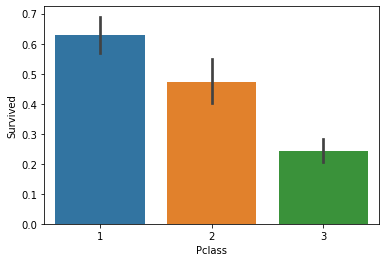

In [20]:
#plot to see survived passengers by different class


sns.barplot(x='Pclass', y='Survived', data=train)

In [21]:
#same thing according to sex

train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [23]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


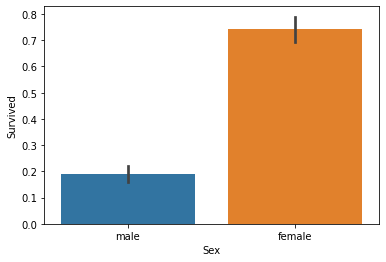

In [24]:
sns.barplot(x='Sex', y='Survived', data=train)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

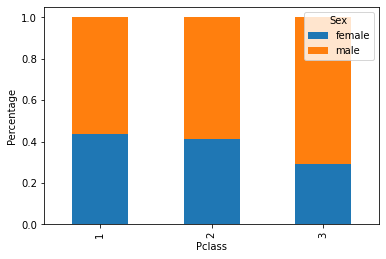

In [25]:
#stacked 2 features i.e. pclass and sex and made a plot using it

tab = pd.crosstab(train['Pclass'], train['Sex'])
print(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

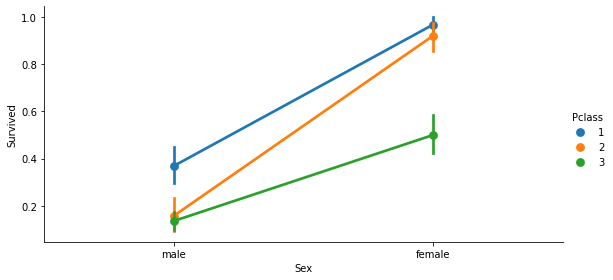

In [27]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

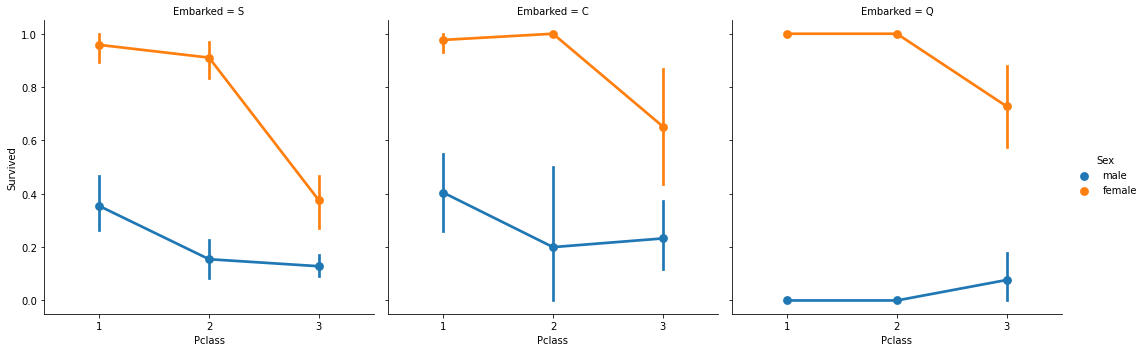

In [28]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

In [29]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [31]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


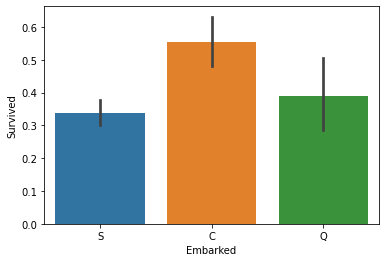

In [32]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [33]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [34]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [35]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


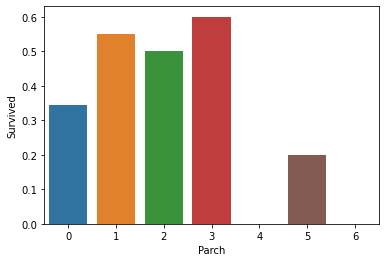

In [36]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train)

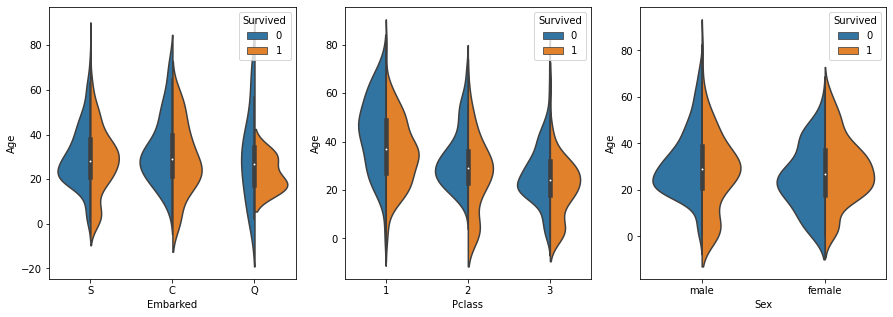

In [38]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

In [42]:
#Feature Extraction

train_test_data = [train, test] #combine train and test data

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract('([A-za-z]+)\.')

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [44]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [45]:
#replacing various titles with 'other' and fake titles with authentic ones

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [46]:
#mapping features with numbers

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [48]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [50]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [51]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [54]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


In [58]:
#creating age band

for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
    train['AgeBand'] = pd.cut(train['Age'], 5)
    
    print(train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.518182
1   (16.0, 32.0]  0.358575
2   (32.0, 48.0]  0.369048
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909
         AgeBand  Survived
0  (-0.08, 16.0]  0.518182
1   (16.0, 32.0]  0.358575
2   (32.0, 48.0]  0.369048
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


In [60]:
#mapping age group to numbers

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


In [62]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [63]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print(train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [64]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [65]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [66]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [67]:
#Feature Selection

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]",1,1


In [68]:
#dropping features not required for prediction

features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [69]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [70]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


In [71]:
#Define train and test set; removing survived from train and putting it in y_train i.e. target variable

X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [72]:
#using logistic regression for prediction

clf = LogisticRegression()
clf.fit(X_train, y_train) #training using fit()
y_pred_log_reg = clf.predict(X_test) #predicting using predict()
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

80.02 percent


In [75]:
clf2 = SVC()
clf2.fit(X_train, y_train)
y_pred_svc = clf2.predict(X_test)
acc_svc = round(clf2.score(X_train, y_train) * 100, 2)
print(acc_svc)

83.73


In [76]:
clf3 = LinearSVC()
clf3.fit(X_train, y_train)
y_pred_linear_svc = clf3.predict(X_test)
acc_linear_svc = round(clf3.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

79.57


In [77]:
clf4 = KNeighborsClassifier(n_neighbors = 3)
clf4.fit(X_train, y_train)
y_pred_knn = clf4.predict(X_test)
acc_knn = round(clf4.score(X_train, y_train) * 100, 2)
print(acc_knn)

85.07


In [78]:
clf5 = DecisionTreeClassifier()
clf5.fit(X_train, y_train)
y_pred_decision_tree = clf5.predict(X_test)
acc_decision_tree = round(clf5.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

87.43


In [79]:
clf6 = RandomForestClassifier(n_estimators=100)
clf6.fit(X_train, y_train)
y_pred_random_forest = clf6.predict(X_test)
y_pred_random_forest_training_set = clf6.predict(X_train)
acc_random_forest = round(clf6.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

87.43


In [80]:
clf7 = GaussianNB()
clf7.fit(X_train, y_train)
y_pred_gnb = clf7.predict(X_test)
acc_gnb = round(clf7.score(X_train, y_train) * 100, 2)
print(acc_gnb)

77.67


In [81]:
clf8 = Perceptron(max_iter=5, tol=None)
clf8.fit(X_train, y_train)
y_pred_perceptron = clf8.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print(acc_perceptron)

80.02


In [82]:
clf9 = SGDClassifier(max_iter=5, tol=None)
clf9.fit(X_train, y_train)
y_pred_sgd = clf9.predict(X_test)
acc_sgd = round(clf9.score(X_train, y_train) * 100, 2)
print(acc_sgd)

70.59


Confusion Matrix in Numbers
[[507  42]
 [ 70 272]]

Confusion Matrix in percentage
[[0.92 0.08]
 [0.2  0.8 ]]



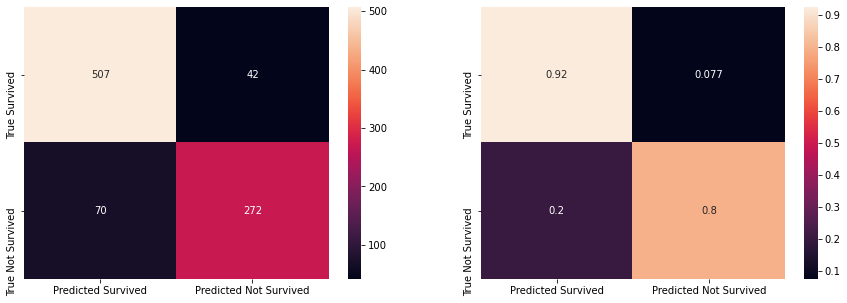

In [83]:
from sklearn.metrics import confusion_matrix
import itertools

class_names = ['Survived', 'Not Survived']

#Compute Confusion Matrix

cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print('Confusion Matrix in Numbers')
print(cnf_matrix)
print('')

cnf_matrix_percent = cnf_matrix.astype('float')/cnf_matrix.sum(axis=1)[:, np.newaxis]

print('Confusion Matrix in percentage')
print(cnf_matrix_percent)
print('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']


df_cnf_matrix = pd.DataFrame(cnf_matrix,
                            index = true_class_names,
                            columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                    index = true_class_names,
                                    columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [85]:
#Feature Selection using RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100)).fit(X_train, y_train)
print(selector.threshold_)
selector.get_support()
selector_columns = X_train.columns[(selector.get_support())]
print(selector_columns)
#selector.transform(X_train)

0.14285714285714285
Index(['Pclass', 'Sex', 'Title'], dtype='object')


In [86]:
#Feature Selection using Logistic Regression

selector2 = SelectFromModel(estimator=LogisticRegression()).fit(X_train, y_train)
selector2.estimator_.coef_
selector2.threshold_
selector2.get_support()
selector2_columns = X_train.columns[(selector2.get_support())]
selector2_columns

Index(['Pclass', 'Sex'], dtype='object')

In [87]:
#Feature Selection using DecisionTreeClassfier

selector3 = SelectFromModel(estimator=DecisionTreeClassifier()).fit(X_train, y_train)
#selector3.estimator_.coef_
selector3.threshold_
selector3.get_support()
selector3_columns = X_train.columns[(selector3.get_support())]
selector3_columns

Index(['Pclass', 'Title'], dtype='object')

In [88]:
#Feature Selection using SVC

selector4 = SelectFromModel(estimator=SVC(kernel='linear')).fit(X_train, y_train)
selector4.estimator_.coef_
selector4.threshold_
selector4.get_support()
selector4_columns = X_train.columns[(selector3.get_support())]
selector4_columns

Index(['Pclass', 'Title'], dtype='object')

In [89]:
#Feature Selection using SGDClassifier

selector5 = SelectFromModel(estimator=SGDClassifier()).fit(X_train, y_train)
selector5.estimator_.coef_
selector5.threshold_
selector5.get_support()
selector5_columns = X_train.columns[(selector3.get_support())]
selector5_columns

Index(['Pclass', 'Title'], dtype='object')

In [90]:
#Parameter Optimisation using GridSearchCV on RandomForestClassifier

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100, 150, 200], 'max_depth': [2, 10, 50]}
rfc = RandomForestClassifier()
clf10 = GridSearchCV(rfc, parameters)
clf10.fit(X_train, y_train)
#print(clf10)
print(clf10.best_score_)
print(clf10.best_estimator_.max_depth)
print(clf10.best_estimator_.n_estimators)
type(clf10.best_estimator_)
#sorted(clf10.cv_results_.keys())

0.8182160567447117
50
150


sklearn.ensemble._forest.RandomForestClassifier

In [91]:
#Parameter Optimisation using GridSearchCV on LogisticRegression

from sklearn.model_selection import GridSearchCV

parameters = {'max_iter': [100, 150, 200], 'C': [1.0, 2.0, 3.0]}
lgr = LogisticRegression()
clf11 = GridSearchCV(lgr, parameters, cv=None)
clf11.fit(X_train, y_train)
#print(clf10)
print(clf11.best_score_)
print(clf11.best_estimator_.max_iter)
print(clf11.best_estimator_.C)
#sorted(clf10.cv_results_.keys())

0.7979787835038604
100
2.0


In [92]:
#Parameter Optimisation using GridSearchCV on KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [5, 10, 15], 'leaf_size': [30, 40, 50]}
knc = KNeighborsClassifier()
clf12 = GridSearchCV(knc, parameters, cv=None)
clf12.fit(X_train, y_train)
#print(clf10)
print(clf12.best_score_)
print(clf12.best_estimator_.n_neighbors)
print(clf12.best_estimator_.leaf_size)
#sorted(clf10.cv_results_.keys())

0.8092147385600402
15
30


In [94]:
#Scoring Metrics

from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, precision_recall_curve

y_true = pd.Series(y_train[:418]).array
score1 = roc_auc_score(y_true, y_pred_random_forest)
score2 = f1_score(y_true, y_pred_log_reg)
score3 = average_precision_score(y_true, y_pred_decision_tree)
score4 = precision_recall_curve(y_true, y_pred_svc)
print(f"Random Forest ROC Score  : {score1}."'\n\n'
      f"Logistic Regression F1 Score: {score2}."'\n\n'
      f"Decision Tree AP Score: {score3}.")

Random Forest ROC Score  : 0.465896788163118.

Logistic Regression F1 Score: 0.3333333333333333.

Decision Tree AP Score: 0.37733655323258164.
